In [145]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [146]:
df = pd.read_csv('/content/titanic.csv',usecols=['Age', 'Fare', 'Survived'])

In [147]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

df.isnull().sum()

<ipython-input-147-7d9aa130ede2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-147-7d9aa130ede2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
Survived,0
Age,0
Fare,0


In [148]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [149]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-151-1e74553bc9f9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


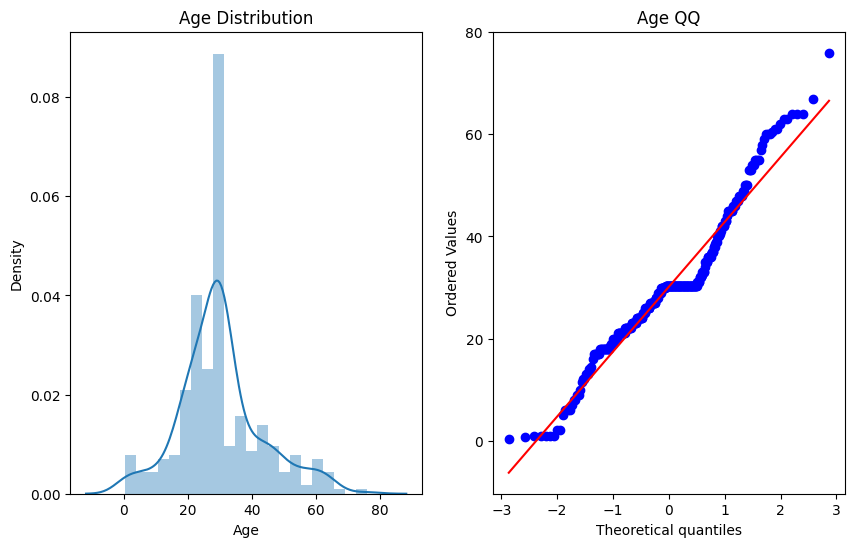

In [151]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age Distribution')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ')

plt.show()

<ipython-input-152-d72fbf65d2d0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


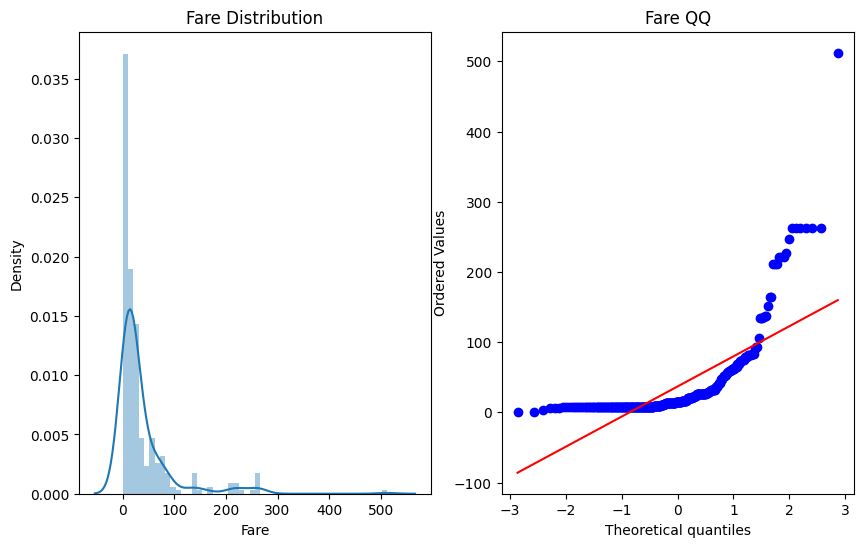

In [152]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare Distribution')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ')

plt.show()

In [153]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print("LR : ", accuracy_score(y_test, lr.predict(X_test)))
print("DT : ", accuracy_score(y_test, dt.predict(X_test)))

LR :  0.6071428571428571
DT :  0.5476190476190477


In [154]:
# Difference between log and log1p is log1p handles 0 also by adding 1 to every input

trf = FunctionTransformer(np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [155]:
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train_transformed, y_train)

print("LR : ", accuracy_score(y_test, lr.predict(X_test_transformed)))
print("DT : ", accuracy_score(y_test, dt.predict(X_test_transformed)))

LR :  0.6190476190476191
DT :  0.5595238095238095


In [156]:
trf = FunctionTransformer(np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train_transformed, y_train)

print("LR : ", np.mean(cross_val_score(lr, X_test_transformed, y_test, scoring='accuracy', cv=10)))
print("DT : ", np.mean(cross_val_score(dt, X_test_transformed, y_test, scoring='accuracy', cv=10)))

LR :  0.6555555555555556
DT :  0.5791666666666666


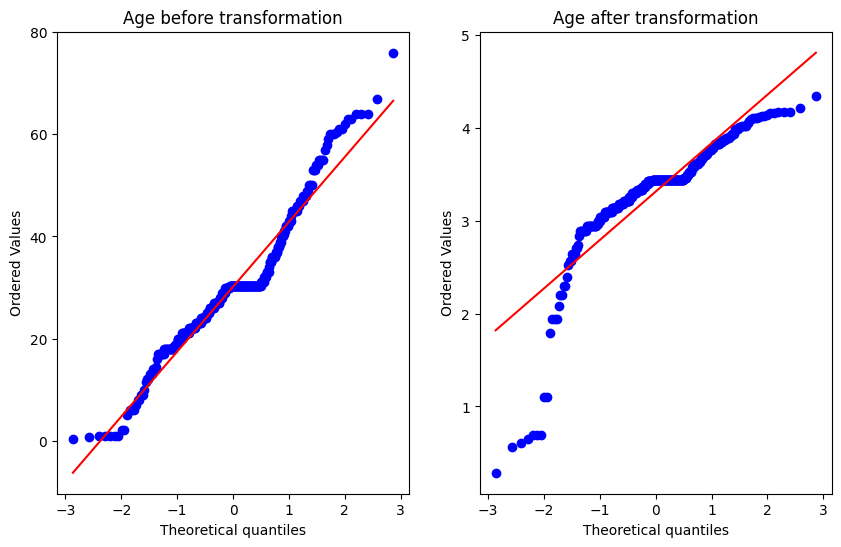

In [157]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age before transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age after transformation')

plt.show()

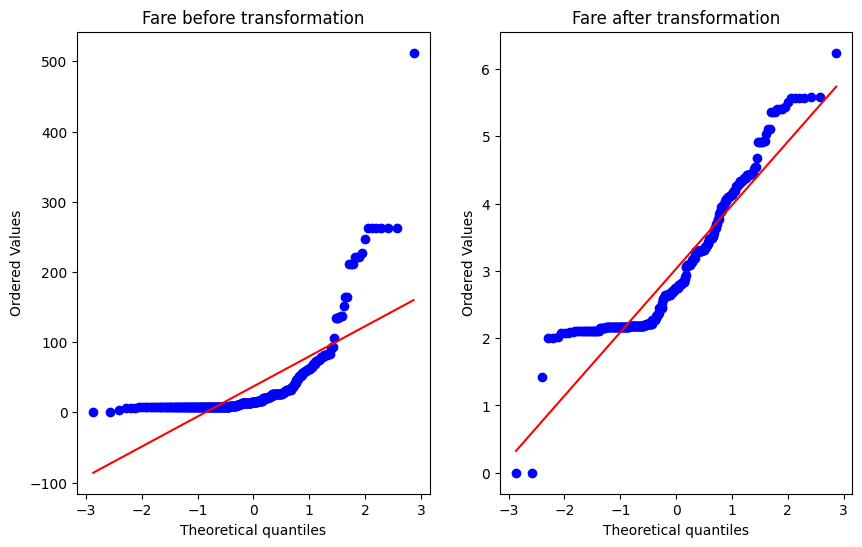

In [158]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare before transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare after transformation')

plt.show()

In [159]:
ct = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['Fare'])
], remainder='passthrough')

ct.fit(X_train)

X_train_transformed = ct.transform(X_train)
X_test_transformed = ct.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train_transformed, y_train)

print("LR : ", accuracy_score(y_test, lr.predict(X_test_transformed)))
print("DT : ", accuracy_score(y_test, dt.predict(X_test_transformed)))

print("LR : ", np.mean(cross_val_score(lr, X_test_transformed, y_test, scoring='accuracy', cv=10)))
print("DT : ", np.mean(cross_val_score(dt, X_test_transformed, y_test, scoring='accuracy', cv=10)))

LR :  0.6190476190476191
DT :  0.5476190476190477
LR :  0.7277777777777777
DT :  0.5458333333333334


In [160]:
def apply_transform(df, transformer):

  X=df.iloc[:, 1:3]
  y=df.iloc[:, 0]

  ct = ColumnTransformer([('log', FunctionTransformer(transformer), ['Fare'])], remainder='passthrough')
  ct.fit(X)
  X_transformed = ct.transform(X)

  lr = LogisticRegression()
  lr.fit(X_transformed, y)

  print("LR : ", np.mean(cross_val_score(lr, X_transformed, y, scoring='accuracy', cv=10)))

  dt = DecisionTreeClassifier()
  dt.fit(X_transformed, y)

  print("DT : ", np.mean(cross_val_score(dt, X_transformed, y, scoring='accuracy', cv=10)))

  plt.figure(figsize=(10, 6))

  plt.subplot(121)
  stats.probplot(X['Fare'], dist="norm", plot=plt)
  plt.title('Fare before transformation')

  plt.subplot(122)
  stats.probplot(X_transformed[:,0], dist="norm", plot=plt)
  plt.title('Fare after transformation')

  plt.show()

LR :  0.6363530778164923
DT :  0.5860627177700348


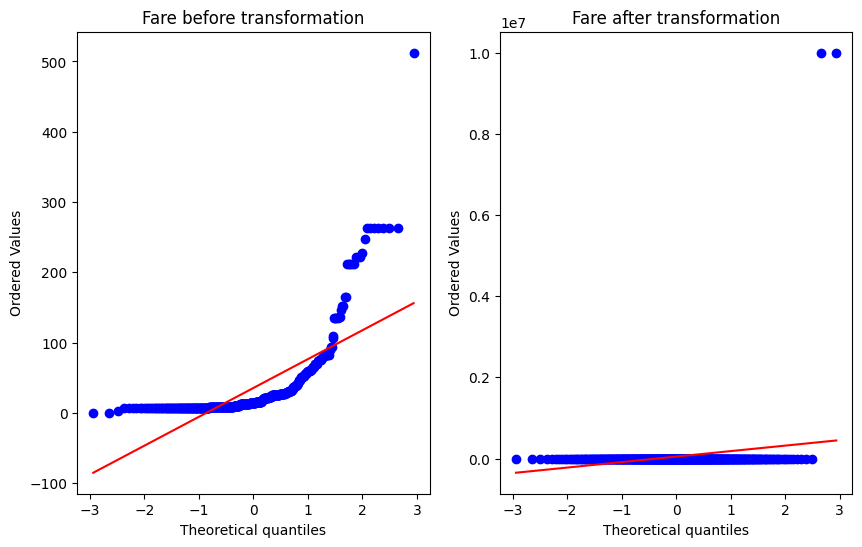

In [161]:
apply_transform(df, lambda x : 1/(x+0.0000001))

In [162]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/concrete_data.csv")

df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [164]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [165]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [166]:
X = df.drop(columns=['Strength'])
y = df.iloc[:, -1]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("R2 : ", r2_score(y_test, lr.predict(X_test)))
print("CV : ", np.mean(cross_val_score(lr, X_test, y_test, scoring='r2', cv=10)))

R2 :  0.627553179231485
CV :  0.6481541789459755


<ipython-input-169-a596d5f07461>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-169-a596d5f07461>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-169-a596d5f07461>:5: UserWarning: 

`distplot` is a deprecated function and will be remov

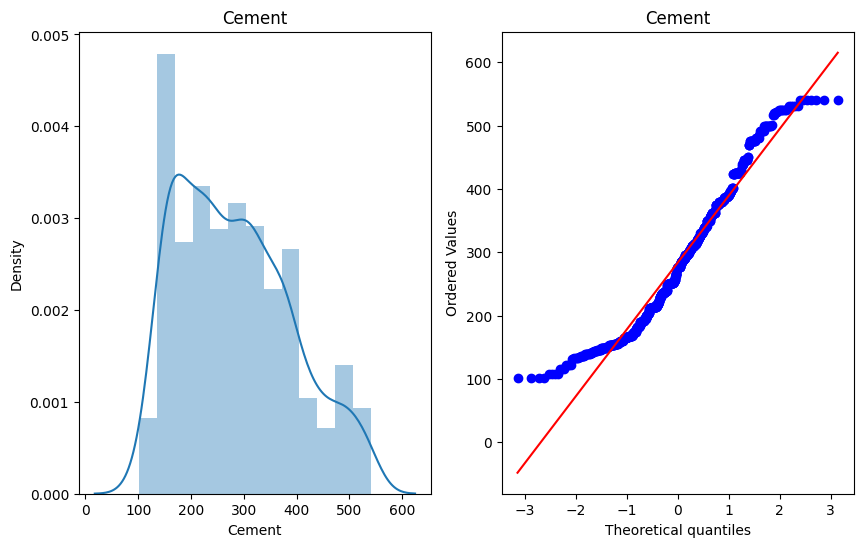

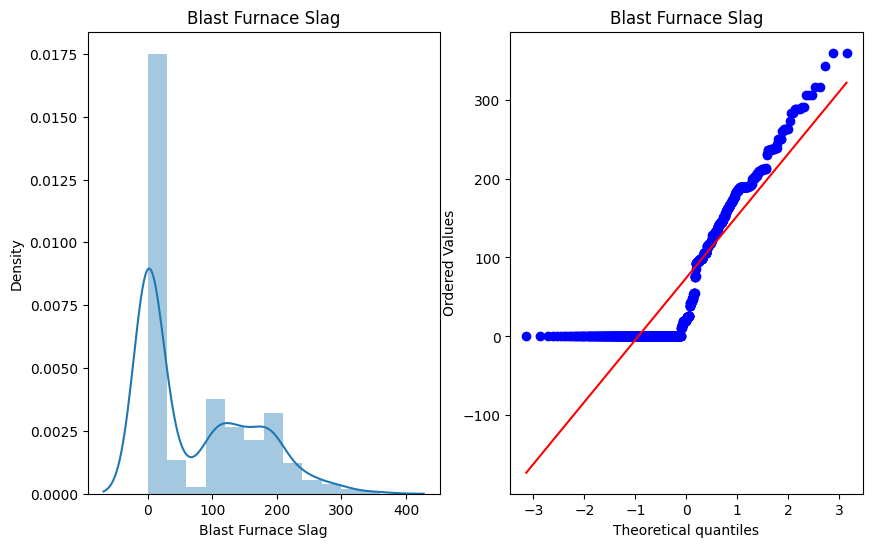

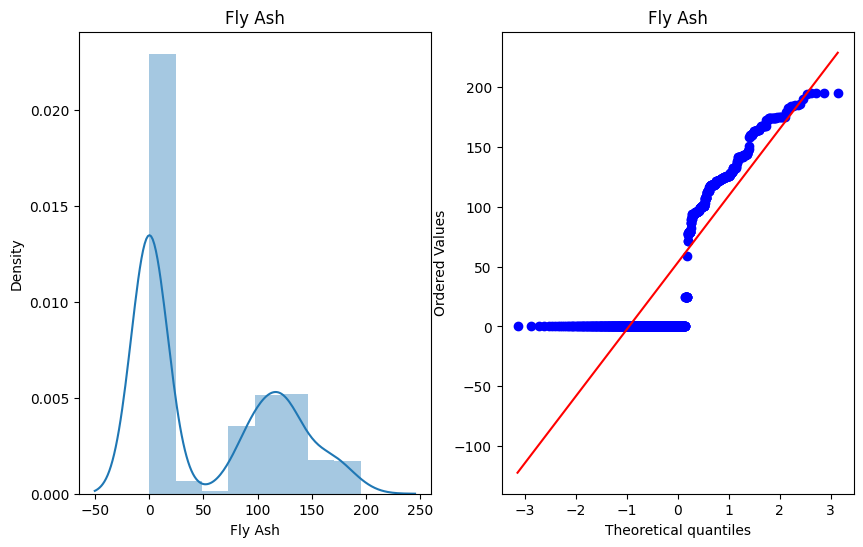

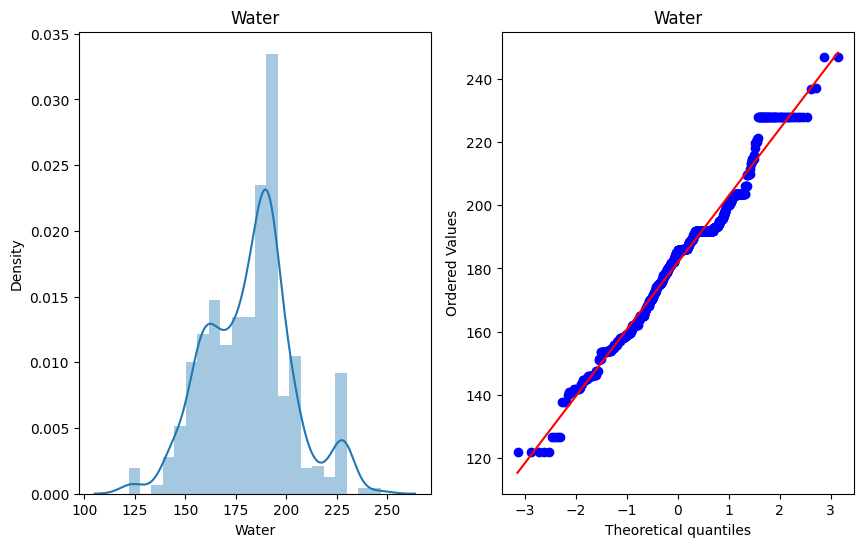

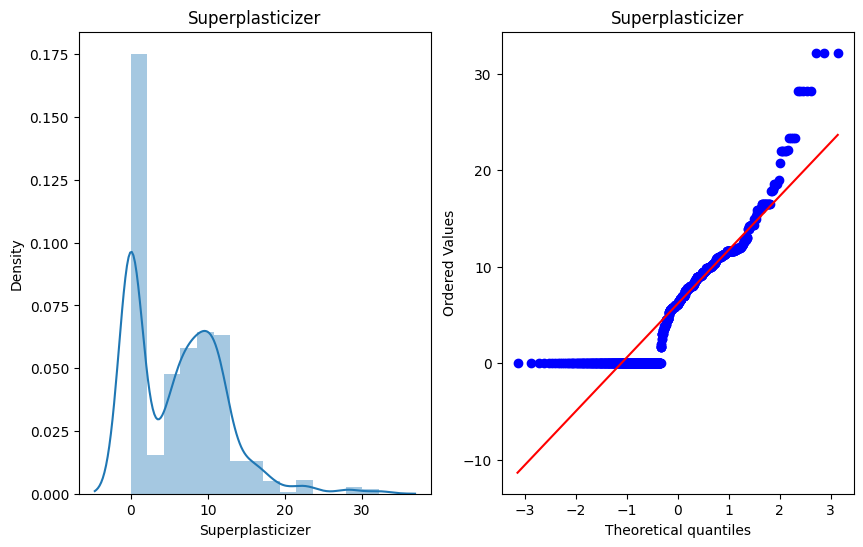

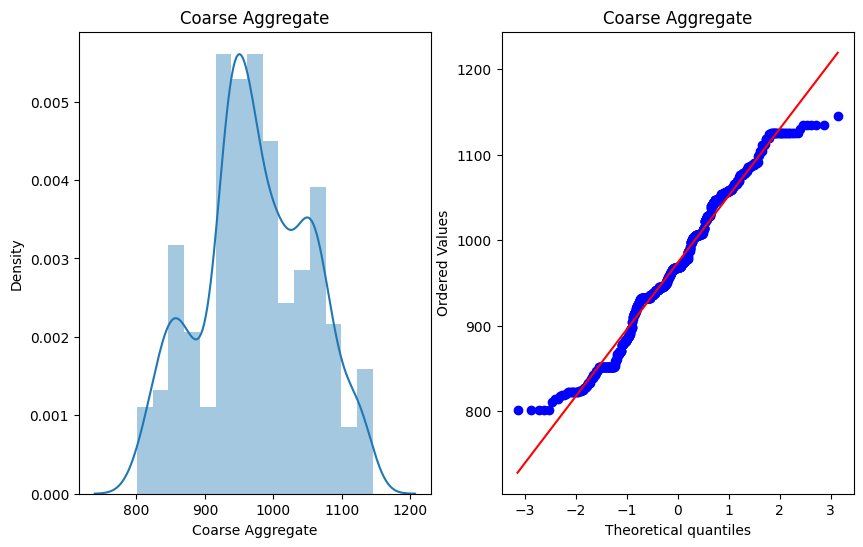

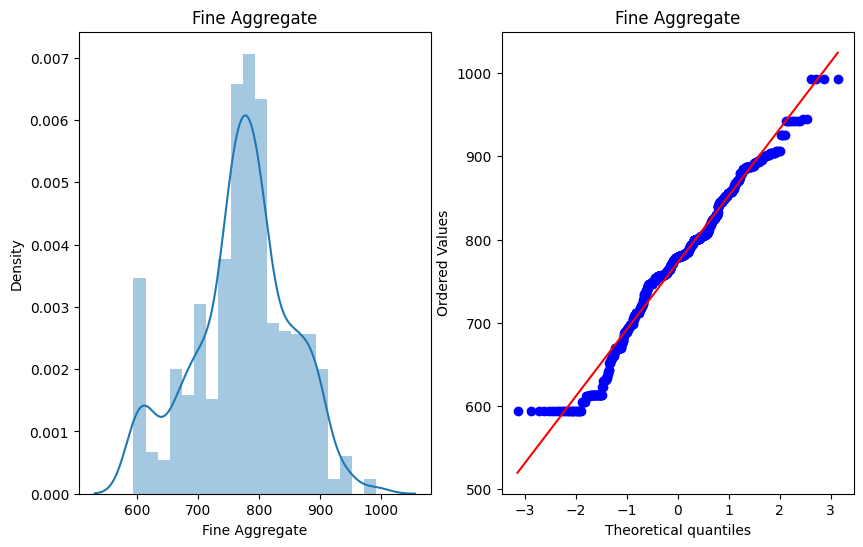

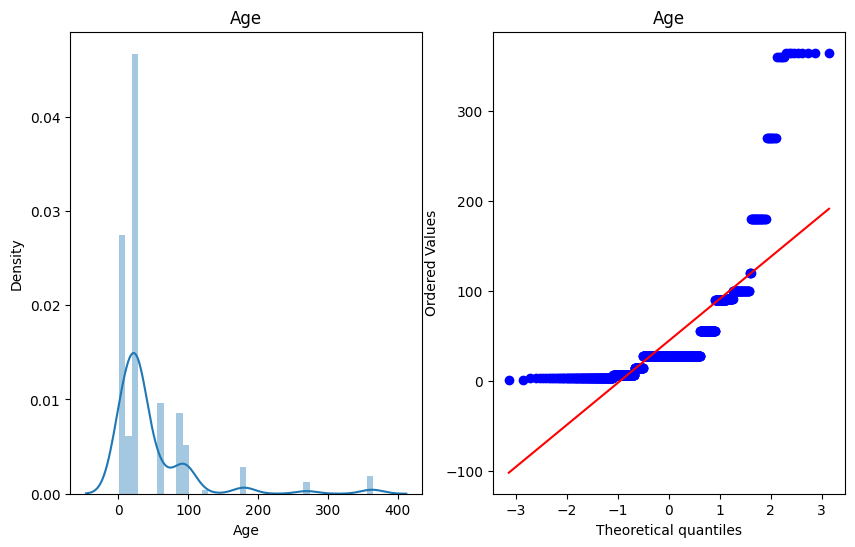

In [169]:
for col in X_train.columns:
  plt.figure(figsize=(10, 6))

  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train[col], dist="norm", plot=plt)
  plt.title(col)

In [170]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.00000001)
X_test_transformed = pt.transform(X_test + 0.00000001)

pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.020795
2,Fly Ash,-0.031170
3,Water,0.772682
4,Superplasticizer,0.077874
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [172]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

print("R2 : ", r2_score(y_test, lr.predict(X_test_transformed)))
print("CV : ", np.mean(cross_val_score(lr, X_test_transformed, y_test, scoring='r2', cv=10)))

R2 :  0.8038298010541689
CV :  0.7984996650520048


<ipython-input-177-b7b2b3e24096>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-177-b7b2b3e24096>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])
<ipython-input-177-b7b2b3e24096>:7: UserWarning: 

`distplot` is a deprecated function and 

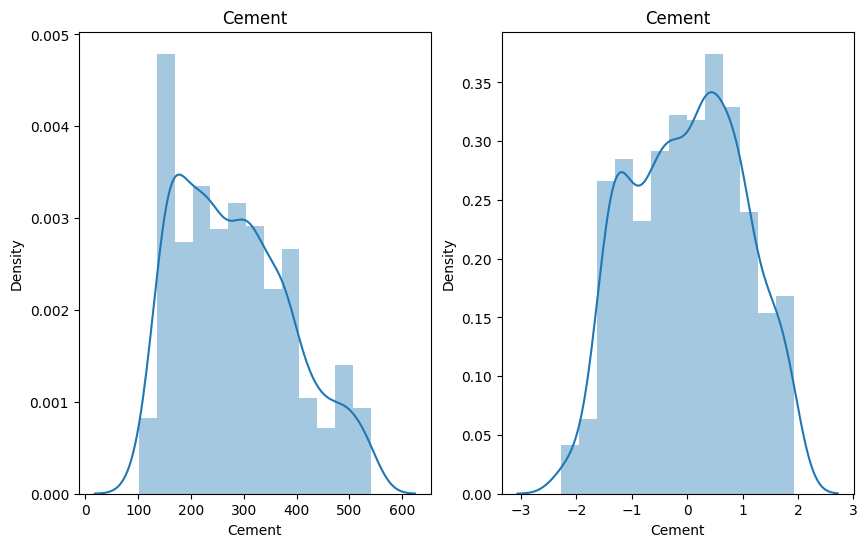

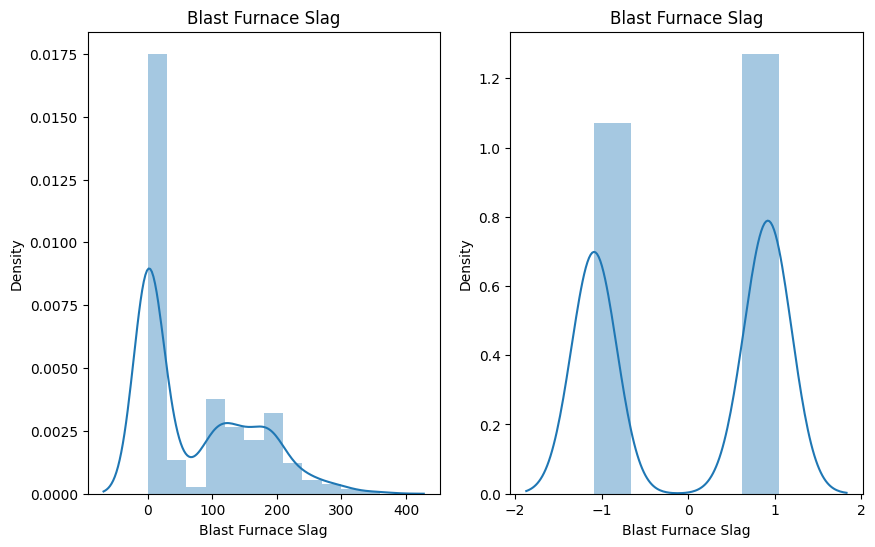

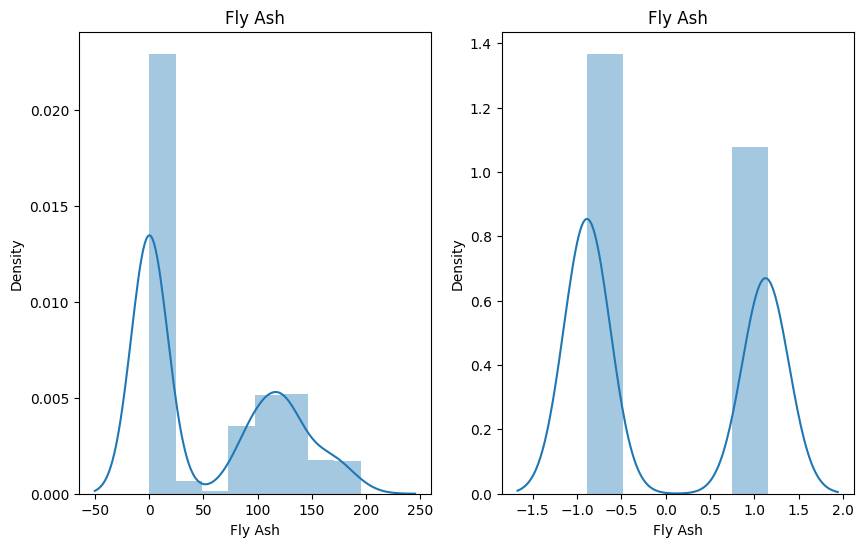

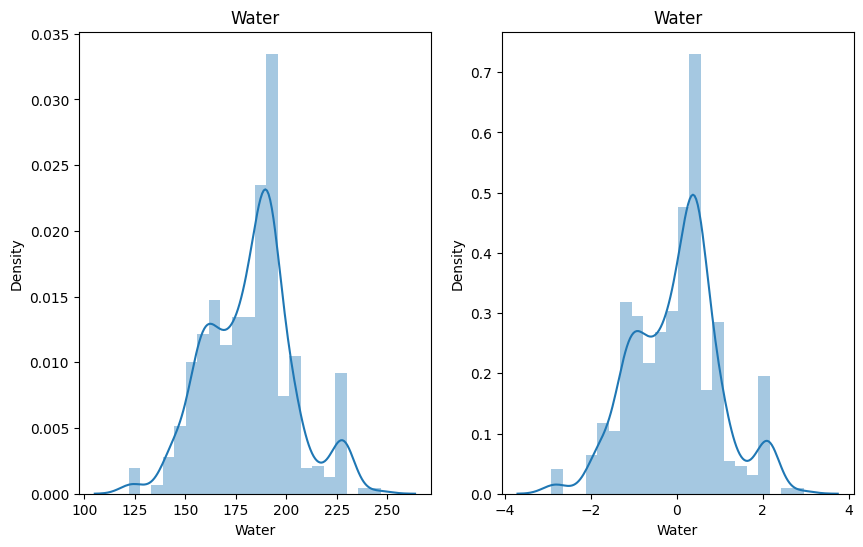

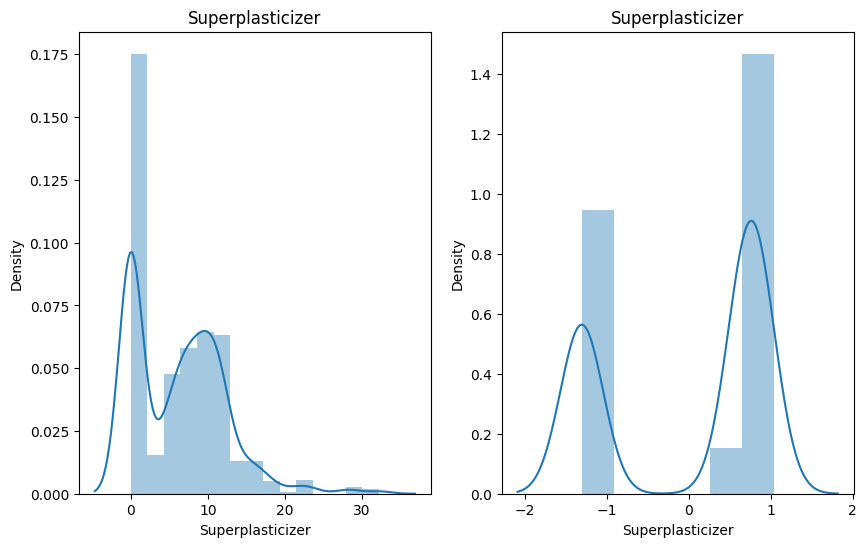

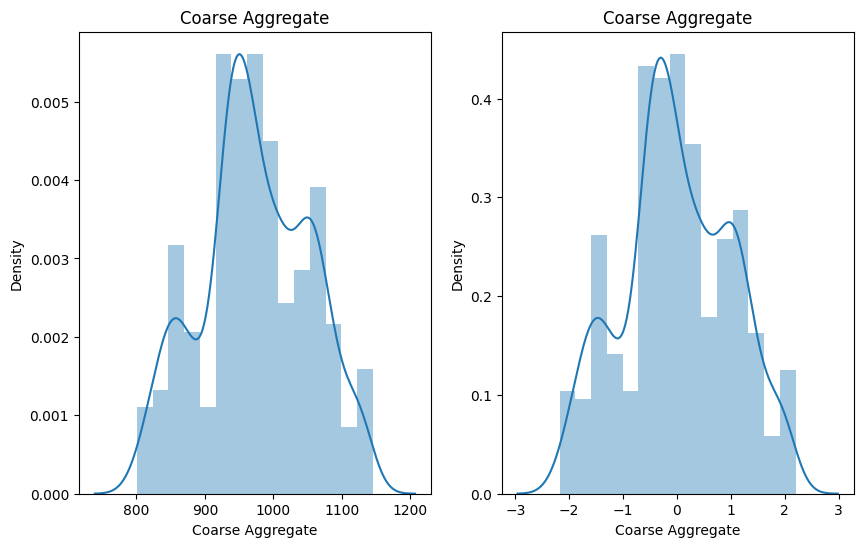

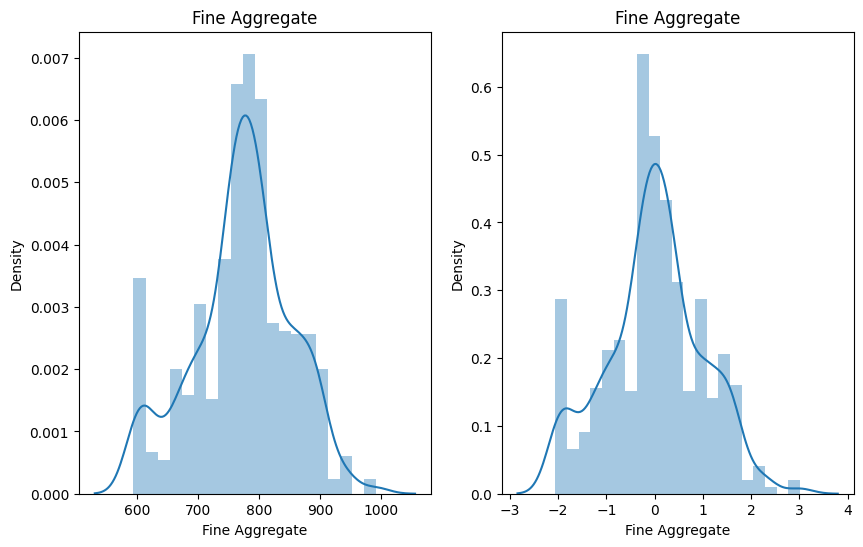

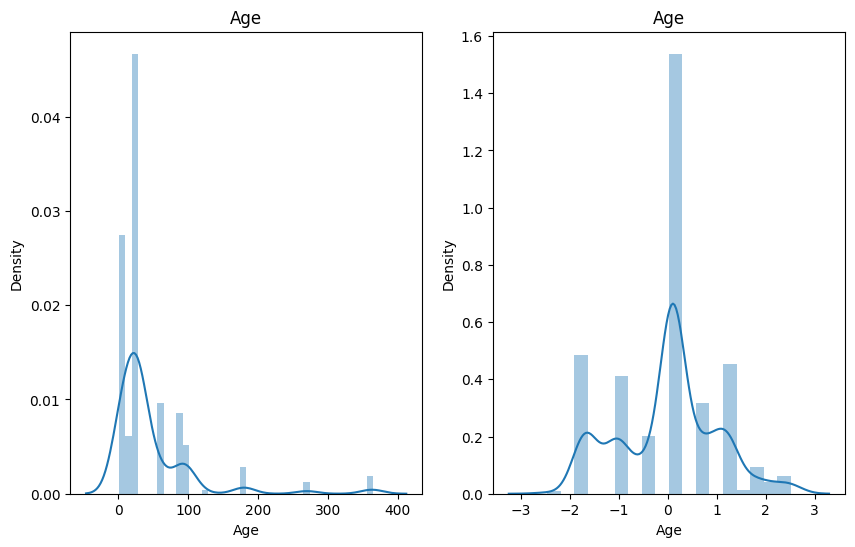

In [177]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train.columns:
  plt.figure(figsize=(10, 6))

  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_transformed[col])
  plt.title(col)

In [178]:
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train + 0.00000001)
X_test_transformed = pt.transform(X_test + 0.00000001)

pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [179]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

print("R2 : ", r2_score(y_test, lr.predict(X_test_transformed)))
print("CV : ", np.mean(cross_val_score(lr, X_test_transformed, y_test, scoring='r2', cv=10)))

R2 :  0.8161906520236428
CV :  0.8080329079578197


<ipython-input-180-b7b2b3e24096>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-180-b7b2b3e24096>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])
<ipython-input-180-b7b2b3e24096>:7: UserWarning: 

`distplot` is a deprecated function and 

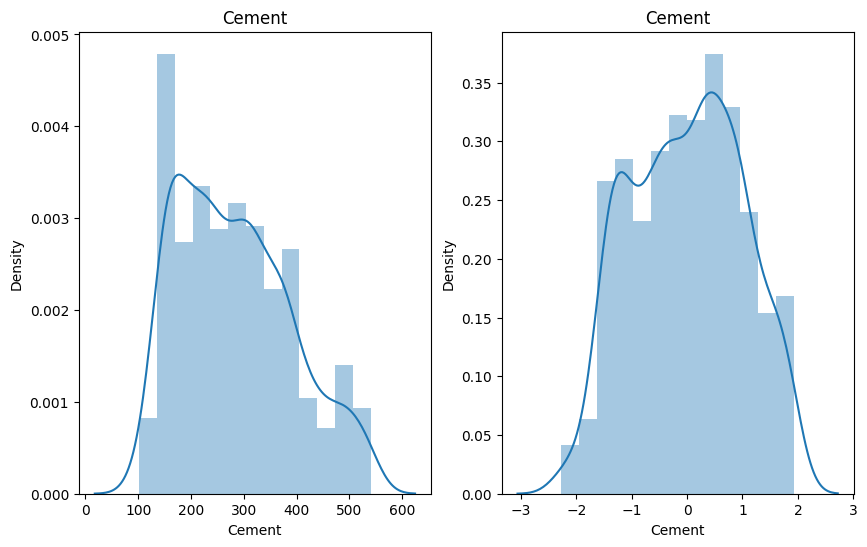

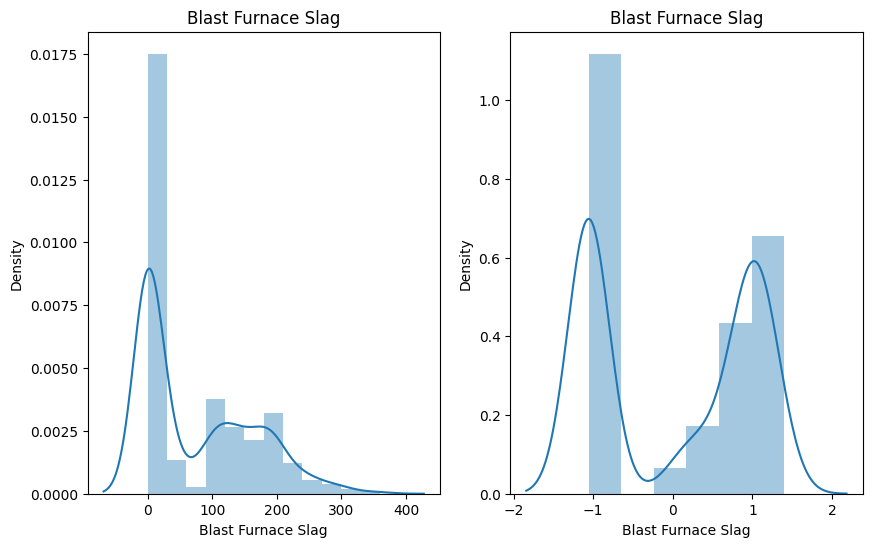

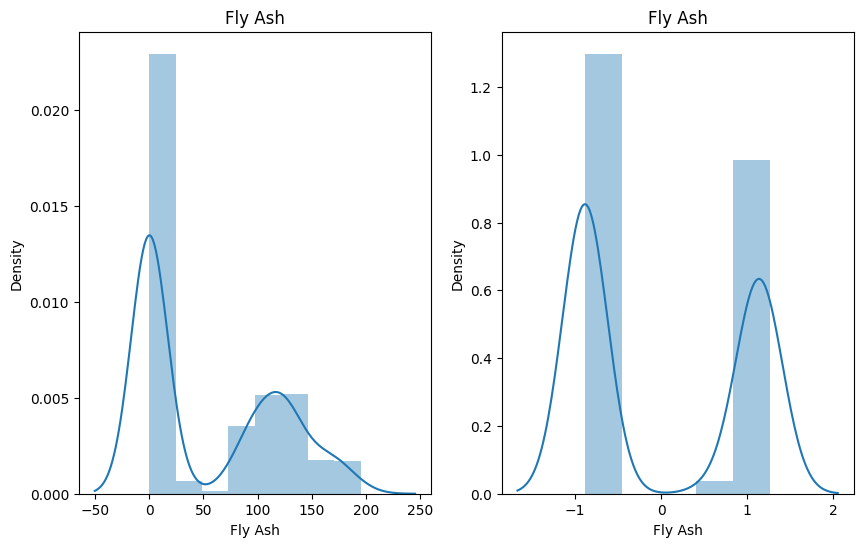

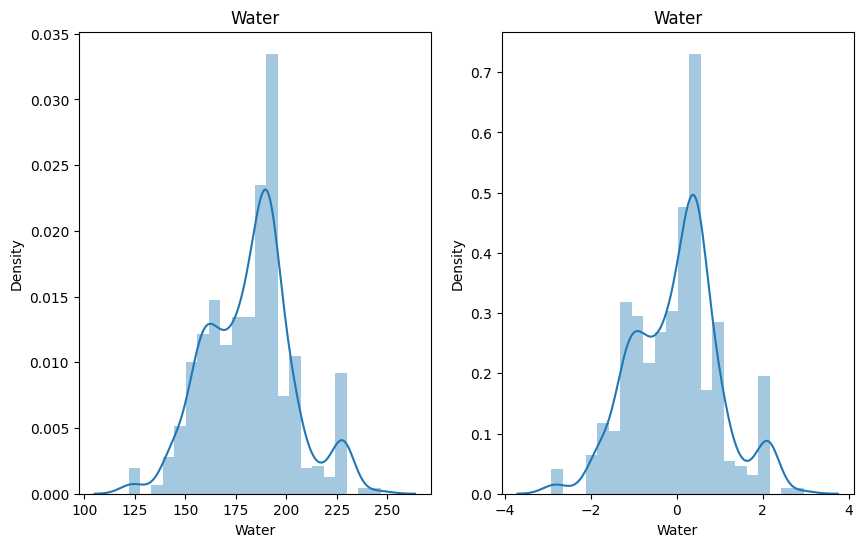

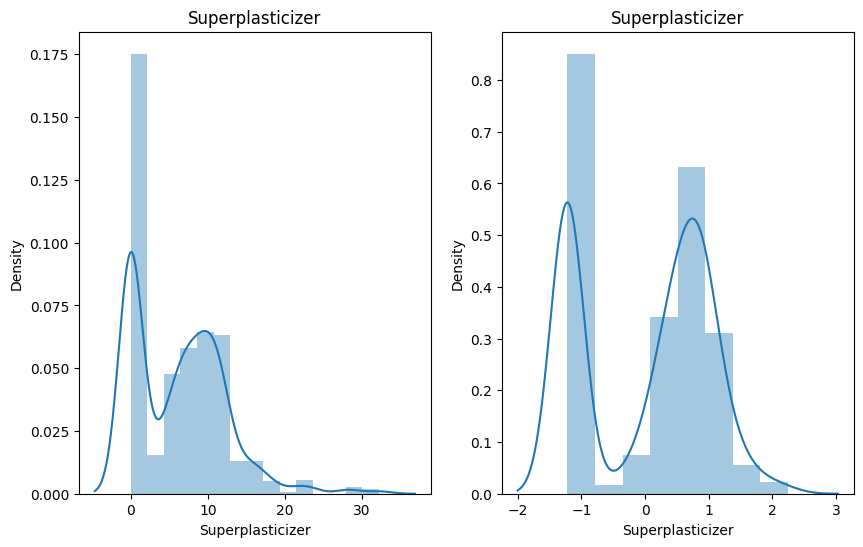

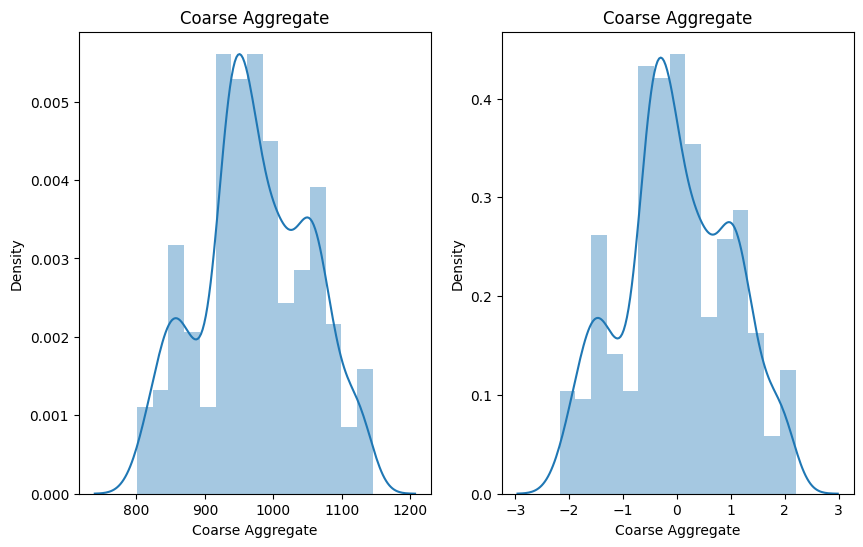

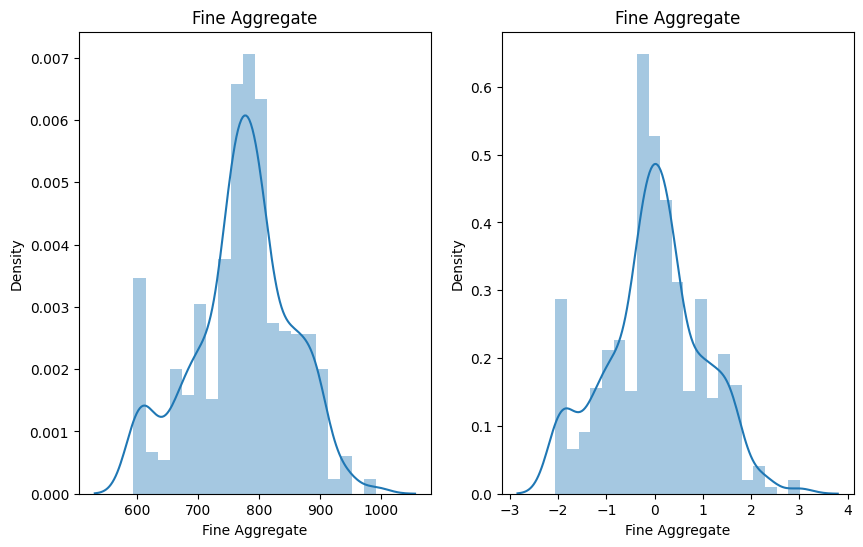

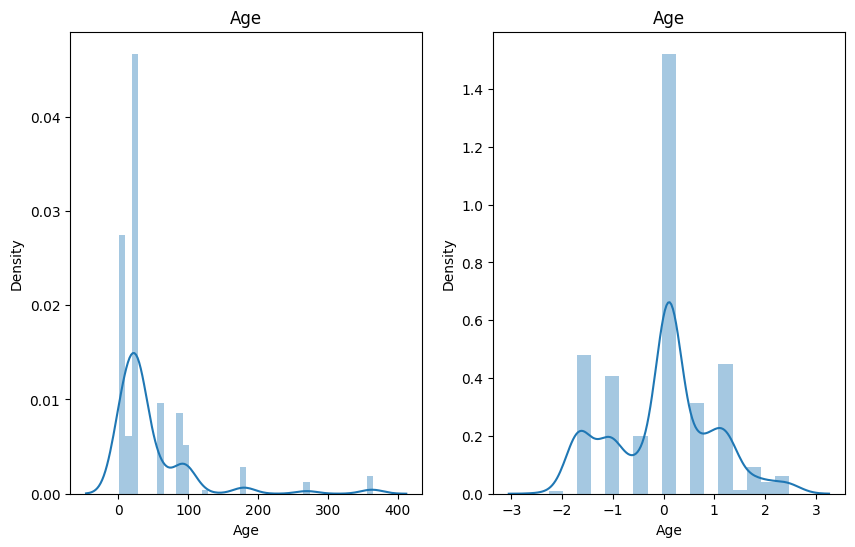

In [180]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train.columns:
  plt.figure(figsize=(10, 6))

  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_transformed[col])
  plt.title(col)